# Hackathon #1 - Binary Classification - Template
Always check the [Reference Document](https://docs.google.com/document/d/1A-1-UK9ol4tegfU4YQySEiBXBeqbx_tu1qdmiMAzNCM/edit?usp=sharing) for all information ;) 

Remember to keep your workflow consistent!

## Regarding the Data
- The dataset can be loaded with `load_data()` (check the already provided code below). It will output two dataframes:
  - `train`: labeled dataset (with target) 
  - `test`: unlabeled dataset (target is not available)
- You will use the `train` data to do your magic! When you are finished and have a predictive model you will have to make predictions using the `test` data and submit it to our platform (where you will get a AUC value - kind of what happens in Kaggle competitions). Check the file `submission_example.csv` for an example and the [Reference Document](https://docs.google.com/document/d/1A-1-UK9ol4tegfU4YQySEiBXBeqbx_tu1qdmiMAzNCM/edit?usp=sharing) for further information.
- You can and should perform train-test splits on the `train` data that you have available. Cross-validation is highly recommended. 
- The target name is `TomorrowRainForecast`: it is either 1 (rains tomorrow) and 0 (does not rain tomorrow).
- The `ID` is the identification variable which is very important for keeping track of the predictions you will make on the `test` data.

*Good luck,  
LDSA team*

# Implementing a Binary Classifier in Python 

# Imports

In [193]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# Import the classifiers that can be used in a binary calssification problem
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split

In [194]:
#Import data
train = pd.read_csv("../data/train.csv", index_col='ID')
test = pd.read_csv("../data/test.csv",  index_col='ID')

In [195]:
train.head(5)

,AmountRain,StrongWindDir,StrongWindSpeed,MorningWindDir,AfternoonWindDir,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DidRainToday,DaysSinceNewYear,TomorrowRainForecast
ID,,,,,,,,,,,,,
5683,0.0,WSW,43.0,N,SW,17.0,82.0,51.0,15.4,20.8,No,268,0
2971,0.0,E,15.0,NaN,SE,7.0,91.0,63.0,9.7,16.6,No,136,0
3560,0.0,S,33.0,WSW,WSW,17.0,58.0,38.0,10.9,15.9,No,217,0
2304,10.0,NE,30.0,S,SSE,11.0,96.0,93.0,4.7,6.4,Yes,195,1
3573,0.0,WSW,48.0,NaN,SW,26.0,59.0,40.0,11.5,15.9,No,232,0


In [196]:
test.head(5)

,AmountRain,StrongWindDir,StrongWindSpeed,MorningWindDir,AfternoonWindDir,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DidRainToday,DaysSinceNewYear
ID,,,,,,,,,,,,
9292,0.0,NNE,56.0,NNW,NNE,35.0,77.0,70.0,24.9,27.0,No,1
7569,0.0,NNW,39.0,NNE,NW,22.0,34.0,12.0,18.6,27.9,No,264
9408,0.0,NNW,24.0,WNW,E,11.0,53.0,46.0,22.6,24.0,No,117
7337,0.0,NNE,46.0,NNE,NE,20.0,27.0,16.0,34.1,40.5,No,4
7928,0.0,WSW,39.0,WSW,WSW,22.0,55.0,34.0,14.8,19.9,No,258


In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 5683 to 2444
Data columns (total 13 columns):
AmountRain              6880 non-null float64
StrongWindDir           6914 non-null object
StrongWindSpeed         6914 non-null float64
MorningWindDir          6035 non-null object
AfternoonWindDir        6849 non-null object
AfternoonWindSpeed      6922 non-null float64
MorningHumidity         6917 non-null float64
AfternoonHumidity       6917 non-null float64
MorningTemp             6930 non-null float64
AfternoonTemp           6928 non-null float64
DidRainToday            6880 non-null object
DaysSinceNewYear        6953 non-null int64
TomorrowRainForecast    6953 non-null int64
dtypes: float64(7), int64(2), object(4)
memory usage: 760.5+ KB


In [198]:
train.describe()

,AmountRain,StrongWindSpeed,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DaysSinceNewYear,TomorrowRainForecast
count,6880.000000,6914.000000,6922.000000,6917.000000,6917.000000,6930.000000,6928.000000,6953.000000,6953.000000
mean,1.944041,33.697426,14.122797,72.891427,47.636114,15.767547,22.219125,177.365741,0.193586
std,6.586221,12.883869,7.251122,18.690028,19.940125,6.002202,6.954120,104.510654,0.395136
min,0.000000,7.000000,0.000000,6.000000,1.000000,0.300000,6.400000,0.000000,0.000000
25%,0.000000,24.000000,9.000000,60.000000,33.000000,11.100000,16.700000,86.000000,0.000000
50%,0.000000,31.000000,13.000000,74.000000,46.000000,15.900000,21.500000,174.000000,0.000000
75%,0.400000,41.000000,19.000000,87.000000,60.000000,20.100000,27.200000,267.000000,0.000000
max,116.000000,107.000000,56.000000,100.000000,100.000000,37.600000,43.700000,365.000000,1.000000


In [199]:
train.select_dtypes(include='object').head()

,StrongWindDir,MorningWindDir,AfternoonWindDir,DidRainToday
ID,,,,
5683,WSW,N,SW,No
2971,E,NaN,SE,No
3560,S,WSW,WSW,No
2304,NE,S,SSE,Yes
3573,WSW,NaN,SW,No


In [200]:
train.isnull().sum()

AmountRain               73
StrongWindDir            39
StrongWindSpeed          39
MorningWindDir          918
AfternoonWindDir        104
AfternoonWindSpeed       31
MorningHumidity          36
AfternoonHumidity        36
MorningTemp              23
AfternoonTemp            25
DidRainToday             73
DaysSinceNewYear          0
TomorrowRainForecast      0
dtype: int64

## EDA - Exploratory data analysis

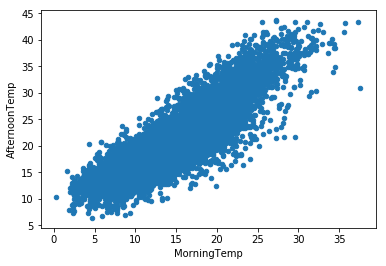

In [201]:
train.plot.scatter(x='MorningTemp', y='AfternoonTemp');

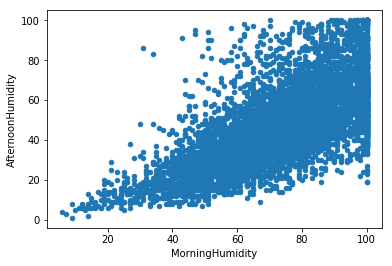

In [202]:
train.plot.scatter(x='MorningHumidity', y='AfternoonHumidity');

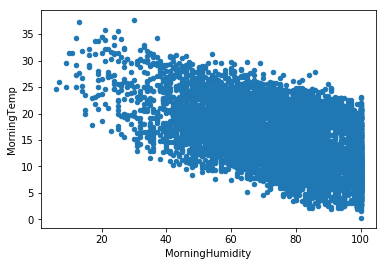

In [203]:
train.plot.scatter(x='MorningHumidity', y='MorningTemp');

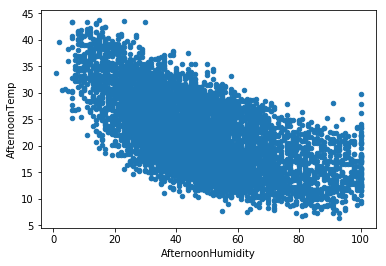

In [204]:
train.plot.scatter(x='AfternoonHumidity', y='AfternoonTemp');

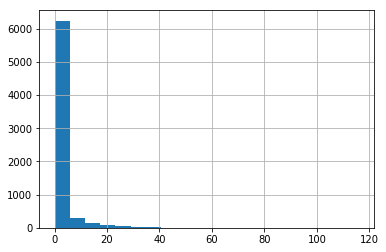

In [205]:
train['AmountRain'].hist(bins=20);

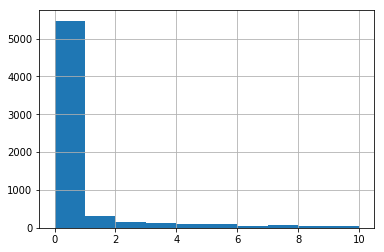

In [206]:
train[train['AmountRain'] <= 10]['AmountRain'].hist(bins=10);

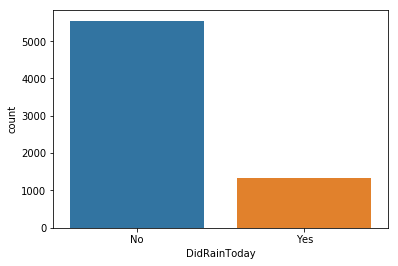

In [207]:
sns.countplot(x='DidRainToday', data=train);

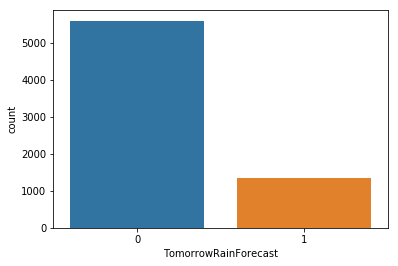

In [208]:
sns.countplot(x='TomorrowRainForecast', data=train);

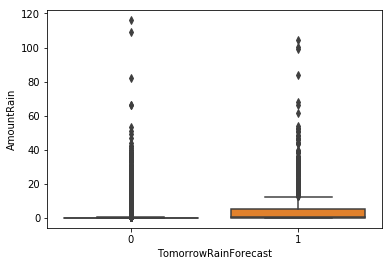

In [209]:
sns.boxplot(x="TomorrowRainForecast", y="AmountRain", data=train);

## Baseline model

In [210]:
train_original = train.copy()
train.head()

,AmountRain,StrongWindDir,StrongWindSpeed,MorningWindDir,AfternoonWindDir,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DidRainToday,DaysSinceNewYear,TomorrowRainForecast
ID,,,,,,,,,,,,,
5683,0.0,WSW,43.0,N,SW,17.0,82.0,51.0,15.4,20.8,No,268,0
2971,0.0,E,15.0,NaN,SE,7.0,91.0,63.0,9.7,16.6,No,136,0
3560,0.0,S,33.0,WSW,WSW,17.0,58.0,38.0,10.9,15.9,No,217,0
2304,10.0,NE,30.0,S,SSE,11.0,96.0,93.0,4.7,6.4,Yes,195,1
3573,0.0,WSW,48.0,NaN,SW,26.0,59.0,40.0,11.5,15.9,No,232,0


In [211]:
train=train.reset_index()
cols_to_drop = ['ID', 'DidRainToday']
train = train.drop(cols_to_drop, axis=1)

In [212]:
train_median = train.median()
train_numerical = train.select_dtypes(include=['int64', 'float64']).fillna(train.median())

In [213]:
train_categorical = train.select_dtypes(include='object').fillna('missing')

In [214]:
train = pd.concat([train_numerical, train_categorical], axis=1)

In [215]:
# get dummies for categorical columns and drop first
train = pd.get_dummies(train, drop_first=True)

In [216]:
train.head()

,AmountRain,StrongWindSpeed,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DaysSinceNewYear,TomorrowRainForecast,StrongWindDir_ENE,...,AfternoonWindDir_NW,AfternoonWindDir_S,AfternoonWindDir_SE,AfternoonWindDir_SSE,AfternoonWindDir_SSW,AfternoonWindDir_SW,AfternoonWindDir_W,AfternoonWindDir_WNW,AfternoonWindDir_WSW,AfternoonWindDir_missing
0,0.0,43.0,17.0,82.0,51.0,15.4,20.8,268,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,15.0,7.0,91.0,63.0,9.7,16.6,136,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,33.0,17.0,58.0,38.0,10.9,15.9,217,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10.0,30.0,11.0,96.0,93.0,4.7,6.4,195,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,48.0,26.0,59.0,40.0,11.5,15.9,232,0,0,...,0,0,0,0,0,1,0,0,0,0


## Create features and target

In [217]:
X = train.drop('TomorrowRainForecast', axis=1)
y = train['TomorrowRainForecast']

## Train model

In [218]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

In [219]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)
logisticReg.score(X_val, y_val)

0.8662511984659635

# Test

In [220]:
test.head(5)

,AmountRain,StrongWindDir,StrongWindSpeed,MorningWindDir,AfternoonWindDir,AfternoonWindSpeed,MorningHumidity,AfternoonHumidity,MorningTemp,AfternoonTemp,DidRainToday,DaysSinceNewYear
ID,,,,,,,,,,,,
9292,0.0,NNE,56.0,NNW,NNE,35.0,77.0,70.0,24.9,27.0,No,1
7569,0.0,NNW,39.0,NNE,NW,22.0,34.0,12.0,18.6,27.9,No,264
9408,0.0,NNW,24.0,WNW,E,11.0,53.0,46.0,22.6,24.0,No,117
7337,0.0,NNE,46.0,NNE,NE,20.0,27.0,16.0,34.1,40.5,No,4
7928,0.0,WSW,39.0,WSW,WSW,22.0,55.0,34.0,14.8,19.9,No,258


In [221]:
test=test.reset_index()
test_ID = test['ID']
test_original = test

In [222]:
columns_to_drop = ['ID', 'DidRainToday']
test = test.drop(columns_to_drop, axis=1)

In [223]:
test_numerical = test.select_dtypes(include=['int64', 'float64']).fillna(train_median)

In [224]:
test_categorical = test.select_dtypes(include='object').fillna('missing')

In [225]:
test = pd.concat([test_numerical, test_categorical], axis=1)

In [226]:
# get dummies for categorical columns and drop first
test = pd.get_dummies(test, drop_first=True)

In [227]:
X_test = test

In [228]:
y_pred = logisticReg.predict_proba(X_test)[:, 1]

In [229]:
predictions = pd.DataFrame({'ID': test_ID,
                           'TomorrowRainForecast': y_pred})

In [230]:
predictions.to_csv('submission.csv', index=False)